In [7]:
from toy_utils import *
from nn_utils import *
from plot_utils import *

In [10]:
paras = {'constraint': Complex_Constraints(),
            'fix_input': False,
            'softmin': True,
            'softrange': True,
            'n_samples': 10000,
            'total_iteration': 10000,
            'batch_size': 256,
            'n_layer': 3,
            'n_hid': 64,
            'n_ip': 2,
            'n_boundary_point': 10,
            'n_bisect_sampling': 10,
            'w_penalty': 1,
            'lr': 1e-3,
            'lr_decay': 0.9,
            'lr_decay_step': 1000,}
paras['proj_para'] = {'corrTestMaxSteps': 100, 'corrEps': 1e-5, 'corrBis':0.5}
model_path = 'results/BP/'
data = Complex_Constraints()
n_dim = 2
c_dim = data.c_dim
err = 0.2
density = 20
n_ip = paras['n_ip']
fix_input = paras['fix_input']
softmin = paras['softmin']
softrange = paras['softrange']

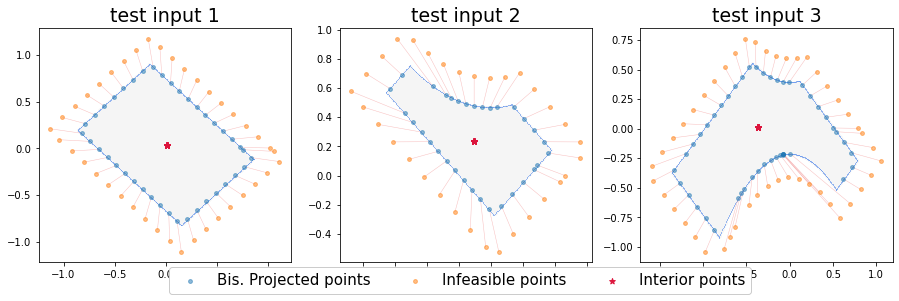

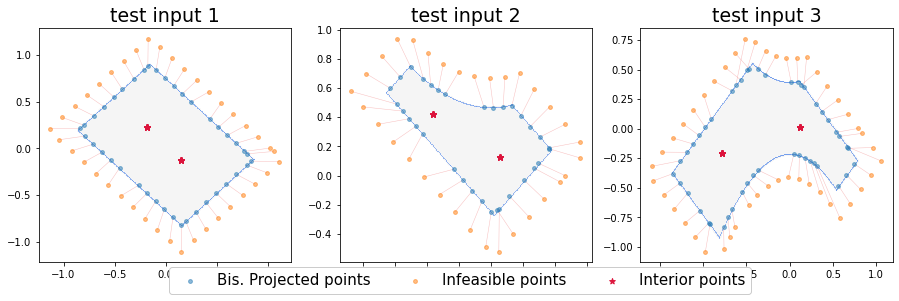

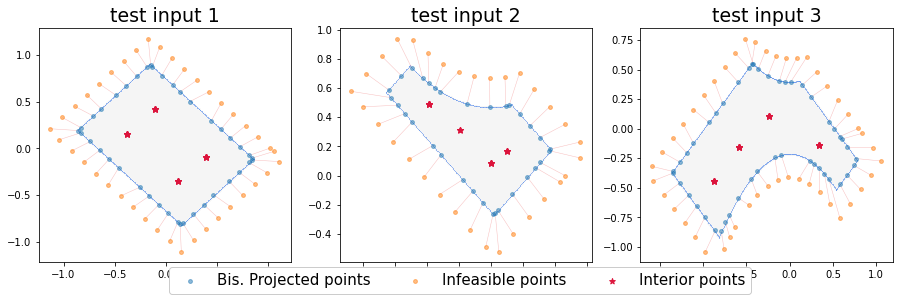

In [15]:
for n_ip in [1, 2, 4]:
    instance = f'fix_{fix_input}_softmin_{softmin}_softrange_{softrange}_ip_{n_ip}'
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    if not os.path.exists(model_path+'pics'):
        os.makedirs(model_path+'pics')
    if not os.path.exists(model_path+'nns'):
        os.makedirs(model_path+'nns')
    # for softmin in [True, False]:
    paras['softmin'] = softmin
    paras['fix_input'] = fix_input
    paras['n_ip'] = n_ip
    model = ResNet(data.c_dim, n_dim * paras['n_ip'], paras['n_hid'], paras['n_layer'] , act=None).to(device)
    if paras['fix_input']:
        c = np.array([[0.5, 0.5, 2, 2, 2, 2, 1, 1]])
    else:
        c = np.random.rand(paras['n_samples'], c_dim)
        c = c * (data.sampling_range[1] - data.sampling_range[0]) + data.sampling_range[0]
    c_tensor = torch.tensor(c).to(device)

    #### Training
    # model, penalty_list, eccentricity_list = unsupervised_training_meip(model, data, n_dim, c_tensor, paras)
    # torch.save(model, model_path +'nns/'+ 'model_' + instance + '.pth')
    # np.save(model_path +'nns/' + 'loss_' + instance + '.npy', [penalty_list, eccentricity_list])

    #### Testing
    # plot_bp_loss(data, paras, model_path, instance, n_dim, c_dim)
    plot_bp_traj_varying_input(data, paras, model_path, instance, n_dim, c_dim, err, density)
